In [1]:
from PIL import Image
import os.path, sys
from skimage.io import imread, imshow
import cv2
from skimage import data, color, feature , exposure
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; sns.set()
import glob
import os

from _helper_functions import resize_aspect_fit , get_hog_feat

# -----------------------------------TRAIN DATA----------------------------------------

In [2]:
path = '/Users/toothless/Downloads/Thesis/data/Train/original/cancer/'
can_re = resize_aspect_fit(path,150)

In [3]:
path = '/Users/toothless/Downloads/Thesis/data/Train/original/_nocancer/'
ncan_re = resize_aspect_fit(path,150)

In [4]:
can_hog_im , can_hog_feat = get_hog_feat(can_re)
ncan_hog_im , ncan_hog_feat = get_hog_feat(ncan_re)

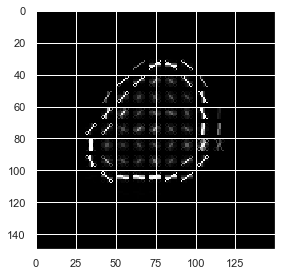

In [5]:
imshow(can_hog_im[0])

In [6]:
train_chog_im , test_chog_im = can_hog_im [:6544] , can_hog_im[6544:]
train_nchog_im , test_nchog_im = ncan_hog_im[:6100] , ncan_hog_im[6100:]

In [8]:
can_labels = np.ones(train_chog_im.shape[0])
nocan_labels = np.zeros(train_nchog_im.shape[0])


#Cancatenate Features and labels
features = np.concatenate((train_chog_im,train_nchog_im),axis = 0)
labels = np.concatenate((can_labels,nocan_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],150*150*1))

# save labels and features to dataframe and shuffle data
train_df = pd.DataFrame(features)
train_df['labels'] = labels

train_df  = train_df.sample(frac=1).reset_index(drop=True)

In [9]:
# Convert Features to Array and Save it
labels = train_df.pop('labels')
features = train_df.values

features = np.reshape(features,(features.shape[0],150,150,1))

In [10]:
features = features /255

In [14]:
img = features[0]

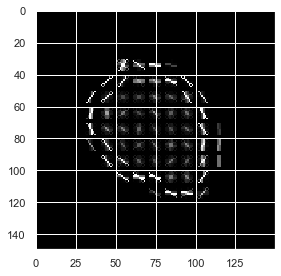

In [26]:
imshow(np.reshape(img,(150,150*1))*255)

In [18]:
# Save test Features
np.savez_compressed('/Users/toothless/Downloads/Thesis/data/feat/HOG/Train_HOG_v2',features=features, labels=labels)

# -------------------------------------TEST DATA----------------------------------------

In [19]:
can_labels = np.ones(test_chog_im.shape[0])
nocan_labels = np.zeros(test_nchog_im.shape[0])

#Cancatenate Features and labels
features = np.concatenate((test_chog_im,test_nchog_im),axis = 0)
labels = np.concatenate((can_labels,nocan_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],150*150*1))

# save labels and features to dataframe and shuffle data
test_df = pd.DataFrame(features)
test_df['labels'] = labels

test_df  = test_df.sample(frac=1).reset_index(drop=True)

In [21]:
# Convert Features to Array and Save it
labels = test_df.pop('labels')
features = test_df.values

features = np.reshape(features,(features.shape[0],150,150,1))

In [22]:
features = features /255

In [23]:
# Save test Features
np.savez_compressed('/Users/toothless/Downloads/Thesis/data/feat/HOG/Test_HOG_v2',features=features, labels=labels)

In [24]:
test_img = features[0]

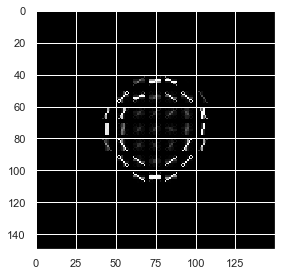

In [27]:
imshow(np.reshape(test_img,(150,150*1))*255)